# How does the change in gasoline in certain countries affect their airline stocks?

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from MCForecastTools import MCSimulation
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

## Import the airline data from Yahoo Finance

In [2]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the csv files from the Airline folder
#Reading csv files

air_canada_df = pd.read_csv(Path("./Airline/air_canada.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
air_canada_df.sort_index(ascending = True, inplace = True)

air_france_df = pd.read_csv(Path("./Airline/air_france.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
air_france_df.sort_index(ascending = True, inplace = True)

american_airlines_df = pd.read_csv(Path("./Airline/american_airlines.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
american_airlines_df.sort_index(ascending = True, inplace = True)

germany_lha_df = pd.read_csv(Path("./Airline/germany_lha.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
germany_lha_df.sort_index(ascending = True, inplace = True)

japan_all_nippon_airways_df = pd.read_csv(Path("./Airline/japan_all_nippon_airways.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
japan_all_nippon_airways_df.sort_index(ascending = True, inplace = True)

uk_tui_airways_df = pd.read_csv(Path("./Airline/uk_tui_airways.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
uk_tui_airways_df.sort_index(ascending = True, inplace = True)


In [3]:
display(air_canada_df.head())
display(air_canada_df.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-01,1.02,1.14,0.95,1.07,1.07,17441100
2012-02-01,1.09,1.43,0.96,0.98,0.98,34513000
2012-03-01,0.99,1.01,0.78,0.94,0.94,20984100
2012-04-01,0.95,1.00,0.82,1.00,1.00,9289000
2012-05-01,1.00,1.00,0.83,0.91,0.91,8412400


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-01,16.719999,20.280001,16.379999,19.610001,19.610001,47953200
2022-11-01,19.900000,20.309999,17.950001,19.290001,19.290001,51838500
2022-12-01,19.340000,19.920000,18.590000,19.389999,19.389999,45319500
2023-01-01,19.680000,23.000000,18.959999,22.580000,22.580000,47605500
2023-02-01,22.549999,23.540001,19.540001,20.120001,20.120001,49618600


In [4]:
air_canada_df.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)
air_canada_df.rename(columns ={"Close":"Air Canada"}, inplace=True)

air_france_df.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)
air_france_df.rename(columns ={"Close":"Air France"}, inplace=True)

american_airlines_df.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)
american_airlines_df.rename(columns ={"Close":"American Airlines"}, inplace=True)

germany_lha_df.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)
germany_lha_df.rename(columns ={"Close":"Germany LHA"}, inplace=True)

japan_all_nippon_airways_df.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)
japan_all_nippon_airways_df.rename(columns ={"Close":"Japan All Nippon Airways"}, inplace=True)

uk_tui_airways_df.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)
uk_tui_airways_df.rename(columns ={"Close":"UK TUI Airways"}, inplace=True)

In [5]:
# Drop nulls
air_canada_df.dropna(inplace = True)
display(air_canada_df.isnull().sum())

air_france_df.dropna(inplace = True)
display(air_france_df.isnull().sum())

american_airlines_df.dropna(inplace = True)
display(american_airlines_df.isnull().sum())

germany_lha_df.dropna(inplace = True)
display(germany_lha_df.isnull().sum())

japan_all_nippon_airways_df.dropna(inplace = True)
display(japan_all_nippon_airways_df.isnull().sum())

uk_tui_airways_df.dropna(inplace = True)
display(uk_tui_airways_df.isnull().sum())

Air Canada    0
dtype: int64

Air France    0
dtype: int64

American Airlines    0
dtype: int64

Germany LHA    0
dtype: int64

Japan All Nippon Airways    0
dtype: int64

UK TUI Airways    0
dtype: int64

In [6]:
display(air_canada_df.head())
display(air_france_df.head())
display(american_airlines_df.head())
display(germany_lha_df.head())
display(japan_all_nippon_airways_df.head())
display(uk_tui_airways_df.head())

,Air Canada
Date,
2012-01-01,1.07
2012-02-01,0.98
2012-03-01,0.94
2012-04-01,1.00
2012-05-01,0.91


,Air France
Date,
2012-01-01,4.850
2012-02-01,4.437
2012-03-01,4.260
2012-04-01,3.625
2012-05-01,3.395


,American Airlines
Date,
2012-01-01,8.44
2012-02-01,7.41
2012-03-01,7.59
2012-04-01,10.26
2012-05-01,13.22


,Germany LHA
Date,
2012-01-01,10.565
2012-02-01,10.420
2012-03-01,10.495
2012-04-01,9.831
2012-05-01,8.482


,Japan All Nippon Airways
Date,
2012-01-01,5.82
2012-02-01,6.08
2012-03-01,5.95
2012-04-01,5.94
2012-05-01,5.39


,UK TUI Airways
Date,
2012-01-01,29.631649
2012-02-01,31.570866
2012-03-01,29.711561
2012-04-01,29.407892
2012-05-01,24.069721


# Align currencies to Canadian dollars

In [7]:
from forex_python.converter import CurrencyRates
c = CurrencyRates()

In [8]:
#Convert currency into CAD for each portfolio 
#get rate for EUR to CAD
air_france_df.reset_index(inplace=True)

def get_rate(x):
    try:
        op = c.get_rate('EUR', 'CAD', x)
    except Exception as re:
        print(re)
        op=None
    return op

air_france_df['Rate'] = air_france_df['Date'].apply(get_rate)

#Create a new column "Air France in CAD"
air_france_df['Air France in CAD'] = air_france_df['Air France']*air_france_df['Rate']

In [9]:
#Convert currency into CAD for each portfolio 
#get rate for USD to CAD
american_airlines_df.reset_index(inplace=True)
def get_rate(x):
    try:
        op = c.get_rate('USD', 'CAD', x)
    except Exception as re:
        print(re)
        op=None
    return op

american_airlines_df['Rate'] = american_airlines_df['Date'].apply(get_rate)

#Create a new column "American Airlines in CAD"
american_airlines_df['American Airlines in CAD'] = american_airlines_df['American Airlines']*american_airlines_df['Rate']
american_airlines_df

,Date,American Airlines,Rate,American Airlines in CAD
0,2012-01-01,8.440000,1.021331,8.620032
1,2012-02-01,7.410000,0.998937,7.402126
2,2012-03-01,7.590000,0.985577,7.480529
3,2012-04-01,10.260000,0.996631,10.225431
4,2012-05-01,13.220000,0.982670,12.990896
...,...,...,...,...
129,2022-10-01,14.180000,1.374744,19.493863
130,2022-11-01,14.430000,1.354077,19.539325
131,2022-12-01,12.720000,1.344844,17.106417
132,2023-01-01,16.139999,1.353835,21.850889


In [10]:
#Convert currency into CAD for each portfolio 
#get rate for EUR to CAD
germany_lha_df.reset_index(inplace=True)
def get_rate(x):
    try:
        op = c.get_rate('EUR', 'CAD', x)
    except Exception as re:
        print(re)
        op=None
    return op

germany_lha_df['Rate'] = germany_lha_df['Date'].apply(get_rate)

#Create a new column "Germany LHA in CAD"
germany_lha_df['Germany LHA in CAD'] = germany_lha_df['Germany LHA']*germany_lha_df['Rate']

In [11]:
#Convert currency into CAD for each portfolio 
#get rate for USD to CAD
japan_all_nippon_airways_df.reset_index(inplace=True)
def get_rate(x):
    try:
        op = c.get_rate('USD', 'CAD', x)
    except Exception as re:
        print(re)
        op=None
    return op

japan_all_nippon_airways_df['Rate'] = japan_all_nippon_airways_df['Date'].apply(get_rate)

#Create a new column "Japan All Nippon Airways in CAD"
japan_all_nippon_airways_df['Japan All Nippon Airways in CAD'] = japan_all_nippon_airways_df['Japan All Nippon Airways']*japan_all_nippon_airways_df['Rate']

In [12]:
#Convert currency into CAD for each portfolio 
#get rate for GBP to CAD
uk_tui_airways_df.reset_index(inplace=True)
def get_rate(x):
    try:
        op = c.get_rate('GBP', 'CAD', x)
    except Exception as re:
        print(re)
        op=None
    return op

uk_tui_airways_df['Rate'] = uk_tui_airways_df['Date'].apply(get_rate)

#Create a new column "UK TUI Airways in CAD"
uk_tui_airways_df['UK TUI Airways in CAD'] = uk_tui_airways_df['UK TUI Airways']*uk_tui_airways_df['Rate']

In [13]:
#drop columns and keep only CAD data
air_france_df.drop(['Air France','Rate'], axis=1, inplace=True)
american_airlines_df.drop(['American Airlines','Rate'], axis=1, inplace=True)
germany_lha_df.drop(['Germany LHA','Rate'], axis=1, inplace=True)
japan_all_nippon_airways_df.drop(['Japan All Nippon Airways','Rate'], axis=1, inplace=True)
uk_tui_airways_df.drop(['UK TUI Airways','Rate'], axis=1, inplace=True)

In [14]:
display(air_canada_df.head())
display(air_france_df.head())
display(american_airlines_df.head())
display(germany_lha_df.head())
display(japan_all_nippon_airways_df.head())
display(uk_tui_airways_df.head())

,Air Canada
Date,
2012-01-01,1.07
2012-02-01,0.98
2012-03-01,0.94
2012-04-01,1.00
2012-05-01,0.91


,Date,Air France in CAD
0,2012-01-01,6.409275
1,2012-02-01,5.839536
2,2012-03-01,5.589120
3,2012-04-01,4.825238
4,2012-05-01,4.408408


,Date,American Airlines in CAD
0,2012-01-01,8.620032
1,2012-02-01,7.402126
2,2012-03-01,7.480529
3,2012-04-01,10.225431
4,2012-05-01,12.990896


,Date,Germany LHA in CAD
0,2012-01-01,13.961647
1,2012-02-01,13.713762
2,2012-03-01,13.769440
3,2012-04-01,13.086044
4,2012-05-01,11.013877


,Date,Japan All Nippon Airways in CAD
0,2012-01-01,5.944146
1,2012-02-01,6.073539
2,2012-03-01,5.864183
3,2012-04-01,5.919987
4,2012-05-01,5.296591


,Date,UK TUI Airways in CAD
0,2012-01-01,46.879234
1,2012-02-01,49.988471
2,2012-03-01,46.690104
3,2012-04-01,46.941894
4,2012-05-01,38.445824


In [15]:
air_france_df.set_index("Date",inplace=True)
american_airlines_df.set_index("Date",inplace=True)
germany_lha_df.set_index("Date",inplace=True)
japan_all_nippon_airways_df.set_index("Date",inplace=True)
uk_tui_airways_df.set_index("Date",inplace=True)

## Combine All Airlines 

In [16]:
# Join 6 Airlines stocks into a single DataFrame with columns for each airline's close price.
df_monthly = pd.concat([uk_tui_airways_df,
                        germany_lha_df,
                        air_france_df, 
                        japan_all_nippon_airways_df,
                        air_canada_df,
                        american_airlines_df,
                       ],
                         axis="columns",join="inner")
df_monthly.head()

,UK TUI Airways in CAD,Germany LHA in CAD,Air France in CAD,Japan All Nippon Airways in CAD,Air Canada,American Airlines in CAD
Date,,,,,,
2012-01-01,46.879234,13.961647,6.409275,5.944146,1.07,8.620032
2012-02-01,49.988471,13.713762,5.839536,6.073539,0.98,7.402126
2012-03-01,46.690104,13.769440,5.589120,5.864183,0.94,7.480529
2012-04-01,46.941894,13.086044,4.825238,5.919987,1.00,10.225431
2012-05-01,38.445824,11.013877,4.408408,5.296591,0.91,12.990896


In [17]:
#export to csv: df_monthly
df_monthly.to_csv("./Airline/df_monthly.csv", sep=',', encoding='utf-8', index=False)

## Calculate and Plot all_airlines stocks

<AxesSubplot:title={'center':'Airline Stocks Price from 2012 to 2023'}, xlabel='Date'>

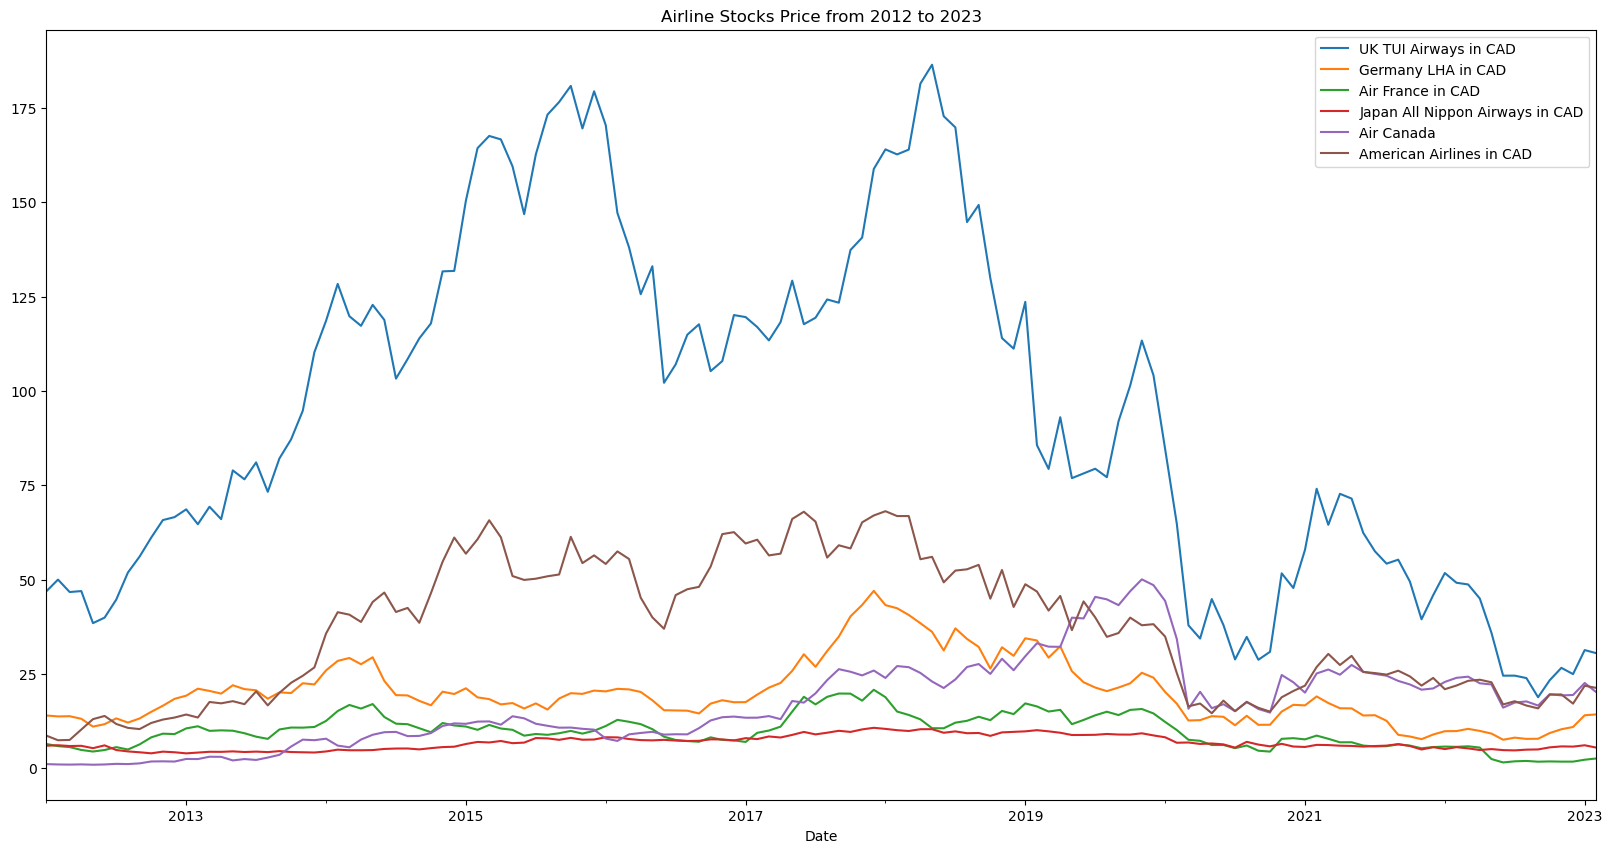

In [18]:
# Plot daily returns of all portfolios
df_monthly.plot(figsize = (20,10), title="Airline Stocks Price from 2012 to 2023")

## Analysis
### UK TUI Airways has the highest stock price at all time, peak is over $175 CAD in 2018. 
### All 6 ariline stocks show a highest price in 2018. 
### In 2020 there is a sharpe decrease for all stocks.

In [19]:
display(air_canada_df.dtypes)
display(air_france_df.dtypes)
display(american_airlines_df.dtypes)
display(germany_lha_df.dtypes)
display(japan_all_nippon_airways_df.dtypes)
display(uk_tui_airways_df.dtypes)

Air Canada    float64
dtype: object

Air France in CAD    float64
dtype: object

American Airlines in CAD    float64
dtype: object

Germany LHA in CAD    float64
dtype: object

Japan All Nippon Airways in CAD    float64
dtype: object

UK TUI Airways in CAD    float64
dtype: object

In [20]:
# Calculate Monthly Returns
air_canada_monthly_returns = air_canada_df.pct_change()
display(air_canada_monthly_returns.head())

air_france_monthly_returns = air_france_df.pct_change()
display(air_france_monthly_returns.head())

american_airlines_monthly_returns = american_airlines_df.pct_change()
display(american_airlines_monthly_returns.head())

germany_lha_monthly_returns = germany_lha_df.pct_change()
display(germany_lha_monthly_returns.head())

japan_all_nippon_airways_monthly_returns = japan_all_nippon_airways_df.pct_change()
display(japan_all_nippon_airways_monthly_returns.head())

uk_tui_airways_monthly_returns = uk_tui_airways_df.pct_change()
display(uk_tui_airways_monthly_returns.head())

,Air Canada
Date,
2012-01-01,NaN
2012-02-01,-0.084112
2012-03-01,-0.040816
2012-04-01,0.063830
2012-05-01,-0.090000


,Air France in CAD
Date,
2012-01-01,NaN
2012-02-01,-0.088893
2012-03-01,-0.042883
2012-04-01,-0.136673
2012-05-01,-0.086385


,American Airlines in CAD
Date,
2012-01-01,NaN
2012-02-01,-0.141288
2012-03-01,0.010592
2012-04-01,0.366940
2012-05-01,0.270450


,Germany LHA in CAD
Date,
2012-01-01,NaN
2012-02-01,-0.017755
2012-03-01,0.004060
2012-04-01,-0.049631
2012-05-01,-0.158349


,Japan All Nippon Airways in CAD
Date,
2012-01-01,NaN
2012-02-01,0.021768
2012-03-01,-0.034470
2012-04-01,0.009516
2012-05-01,-0.105304


,UK TUI Airways in CAD
Date,
2012-01-01,NaN
2012-02-01,0.066324
2012-03-01,-0.065983
2012-04-01,0.005393
2012-05-01,-0.180991


In [22]:
# Drop nulls
air_canada_monthly_returns.dropna(inplace = True)
display(air_canada_monthly_returns.isnull().sum())

air_france_monthly_returns.dropna(inplace = True)
display(air_france_monthly_returns.isnull().sum())

american_airlines_monthly_returns.dropna(inplace = True)
display(american_airlines_monthly_returns.isnull().sum())

germany_lha_monthly_returns.dropna(inplace = True)
display(germany_lha_monthly_returns.isnull().sum())

japan_all_nippon_airways_monthly_returns.dropna(inplace = True)
display(japan_all_nippon_airways_monthly_returns.isnull().sum())

uk_tui_airways_monthly_returns.dropna(inplace = True)
display(uk_tui_airways_monthly_returns.isnull().sum())

Air Canada    0
dtype: int64

Air France in CAD    0
dtype: int64

American Airlines in CAD    0
dtype: int64

Germany LHA in CAD    0
dtype: int64

Japan All Nippon Airways in CAD    0
dtype: int64

UK TUI Airways in CAD    0
dtype: int64

## Combine All Airlines monthly returns

In [23]:
# Join 6 Airlines pct_change into a single DataFrame with columns for each airline's close price.
df_monthly_return = pd.concat([uk_tui_airways_monthly_returns,
                               germany_lha_monthly_returns,
                               air_france_monthly_returns,
                               japan_all_nippon_airways_monthly_returns,
                               air_canada_monthly_returns,
                               american_airlines_monthly_returns
                              ],
                         axis="columns",join="inner")
df_monthly_return.head()

,UK TUI Airways in CAD,Germany LHA in CAD,Air France in CAD,Japan All Nippon Airways in CAD,Air Canada,American Airlines in CAD
Date,,,,,,
2012-02-01,0.066324,-0.017755,-0.088893,0.021768,-0.084112,-0.141288
2012-03-01,-0.065983,0.004060,-0.042883,-0.034470,-0.040816,0.010592
2012-04-01,0.005393,-0.049631,-0.136673,0.009516,0.063830,0.366940
2012-05-01,-0.180991,-0.158349,-0.086385,-0.105304,-0.090000,0.270450
2012-06-01,0.037967,0.058589,0.090930,0.140911,0.076923,0.065409


In [24]:
#export to csv: df_monthly_return
df_monthly_return.to_csv("./Airline/df_monthly_return.csv", sep=',', encoding='utf-8', index=False)

## Calculate and Plot all_airlines stocks monthly returns

<AxesSubplot:title={'center':'Airline Monthly Returns from 2012 to 2023'}, xlabel='Date'>

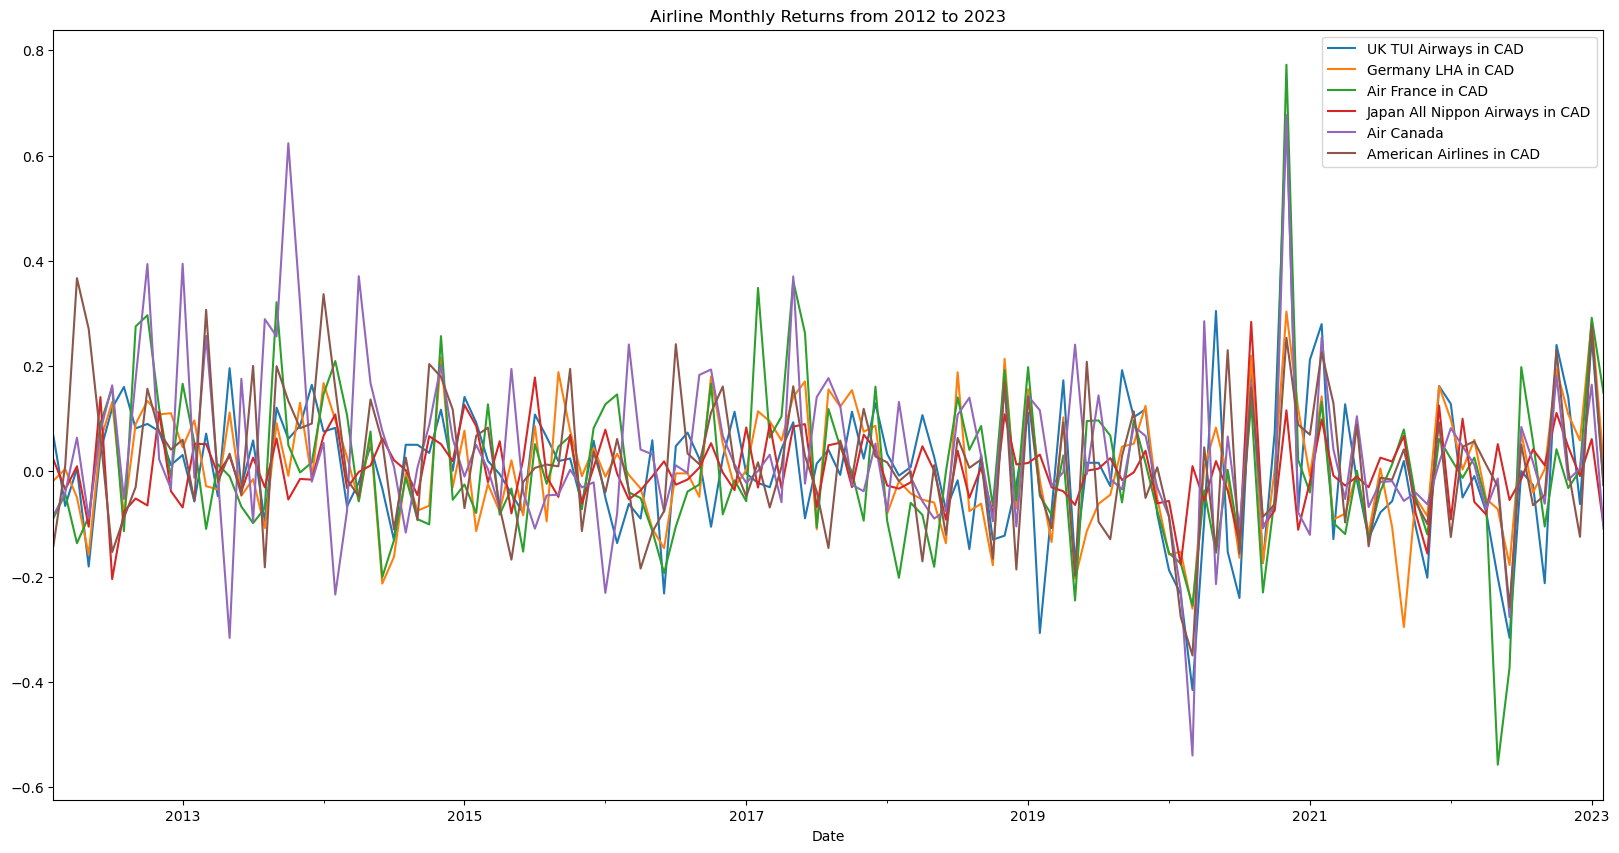

In [26]:
# Plot daily returns of all portfolios
df_monthly_return.plot(figsize = (20,10), title="Airline Monthly Returns from 2012 to 2023")

## Analysis here
### Air France has the highest return in 2020 at nearly 0.8, and the lowest return in 2022 at about -0.6.

### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Monthly Returns on Airlines from 2012 to 2023'}, xlabel='Date'>

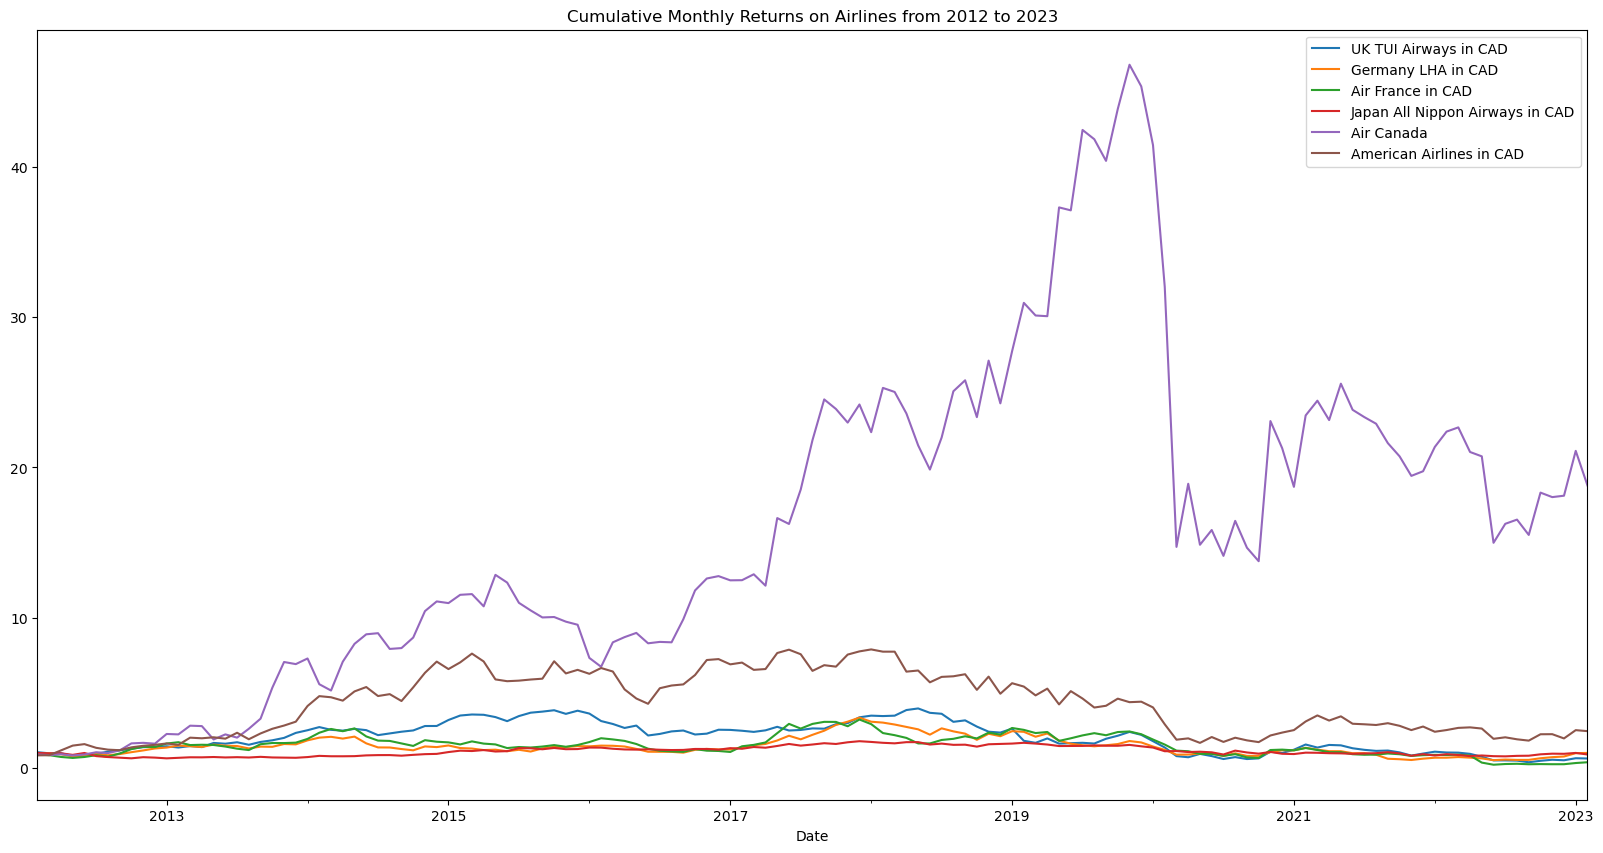

In [27]:
# Calculate cumulative returns of all portfolios
# Plot cumulative returns
df_cum_return = (1+ df_monthly_return).cumprod()
df_cum_return.plot(figsize = (20,10), title="Cumulative Monthly Returns on Airlines from 2012 to 2023")

## Analysis 
### Air Canada has the highest cumulative return for over 40 at the end of 2019, and in early 2020 there is a sharp decrease to <20. This is the biggest price drop over the last 10 years.

## Risk Analysis

### Create a box plot for each portfolio

<AxesSubplot:title={'center':'Monthly Returns from 2012 to 2023'}>

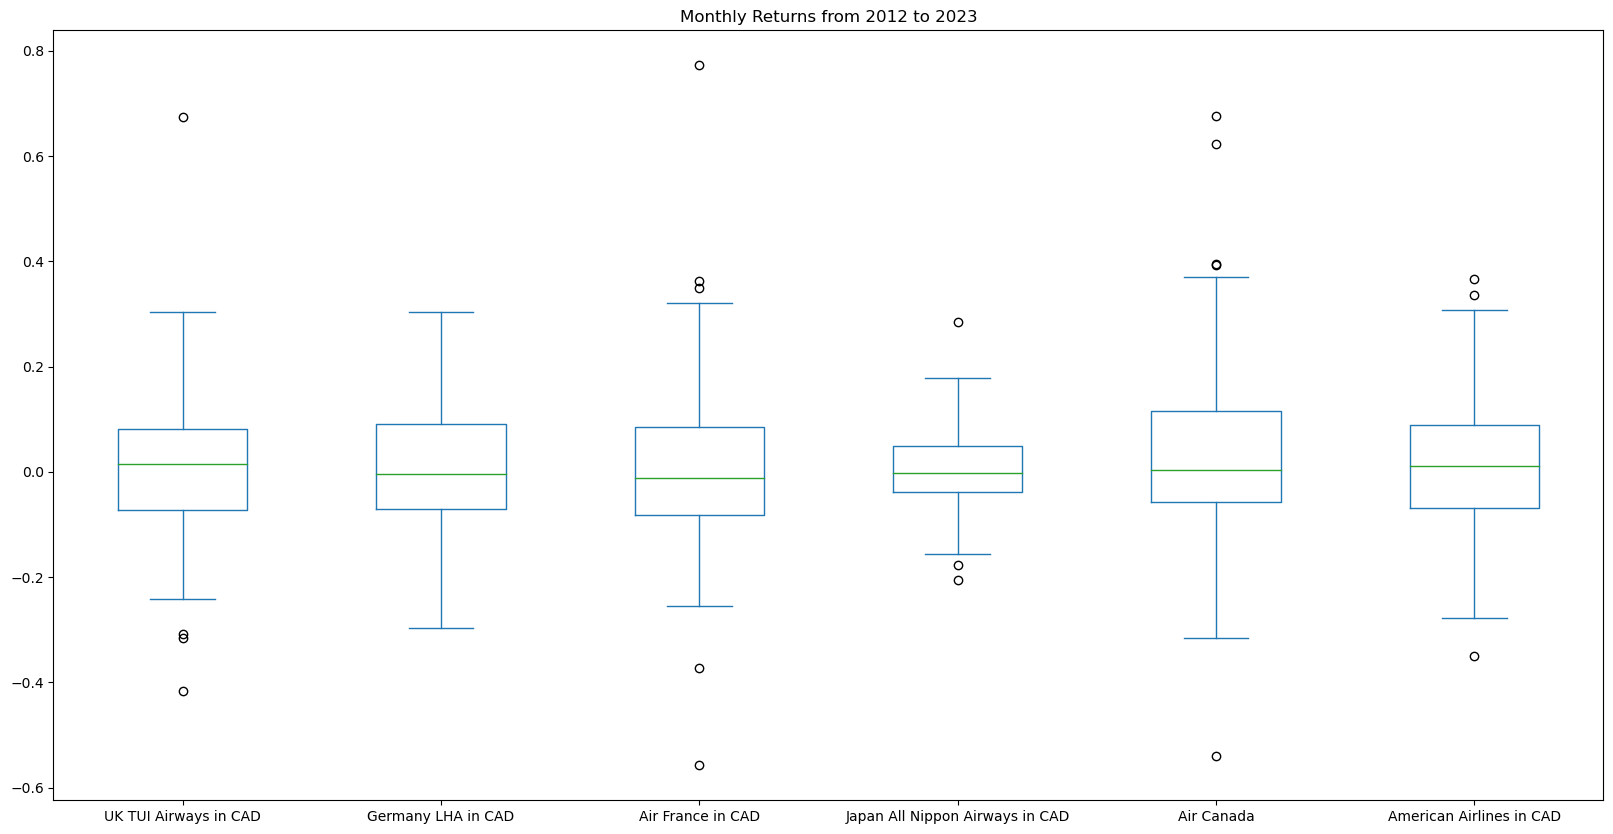

In [28]:
# Box plot to visually show risk

df_monthly_return.plot(kind="box", figsize=(20,10), title="Monthly Returns from 2012 to 2023")

## Analysis
### Air France has the highest return at nearly 0.8 and the lowest return at -0.6, therefore Air France is the most risky airline stocks.
### Japan Airways has the smallest fluctuation among all airline stocks, the return range is from -0.2 to 0.3.

# Import Gasoline and Correlation

In [29]:
# Using the read_csv function and Path module, create a DataFrame by importing internationalpumppricesall.csv file
pump_price_all = pd.read_csv(Path("./Airline/internationalpumppricesall.csv"), parse_dates=True, index_col="Date", infer_datetime_format=True)
pump_price_all.sort_index(inplace=True)

In [30]:
# Drop nulls
pump_price_all.dropna(inplace=True)
pump_price_all.isnull().sum()

UK/Royaume-Uni               0
Germany/Allemagne            0
France                       0
Japan/Japon                  0
Canada                       0
USA/États-Unis d'Amérique    0
Tax Status                   0
Situation fiscale            0
dtype: int64

In [31]:
# Drop column "Situation fiscale"
pump_price_all = pump_price_all.drop(columns="Situation fiscale")

# Rename Columns to reflect only English
pump_price_all.columns = ["UK", "Germany", "France", "Japan", "Canada", "USA", "Tax Status"]
pump_price_all.head()

,UK,Germany,France,Japan,Canada,USA,Tax Status
Date,,,,,,,
2012-01-01,83.5,88.4,88.8,105.9,85.7,79.4,Base
2012-01-01,126.0,118.7,113.0,82.6,38.2,11.1,Tax
2012-01-01,209.5,207.1,201.8,188.5,123.9,90.5,Total
2012-02-01,85.9,94.6,93.7,102.7,88.4,83.4,Base
2012-02-01,126.4,120.9,115.2,79.5,38.7,10.8,Tax


In [32]:
# Slice the column "Tax Status" to filter only the Total price
total_pump_price_all = pump_price_all[pump_price_all["Tax Status"]=="Total"]
total_pump_price_all.head()

,UK,Germany,France,Japan,Canada,USA,Tax Status
Date,,,,,,,
2012-01-01,209.5,207.1,201.8,188.5,123.9,90.5,Total
2012-02-01,212.3,215.5,208.9,182.2,127.1,94.2,Total
2012-03-01,216.6,221.9,213.3,185.9,130.9,101.0,Total
2012-04-01,224.8,223.2,215.9,192.1,134.4,102.2,Total
2012-05-01,220.5,209.6,204.5,191.6,129.4,99.6,Total


In [33]:
# Join your returns DataFrame to the original returns DataFrame
all_df = pd.concat((total_pump_price_all,df_monthly), axis = "columns", join = "inner")
all_df.dropna(inplace=True)

Text(0.5, 1.0, 'Correlation Matrix Gasoline and Airline')

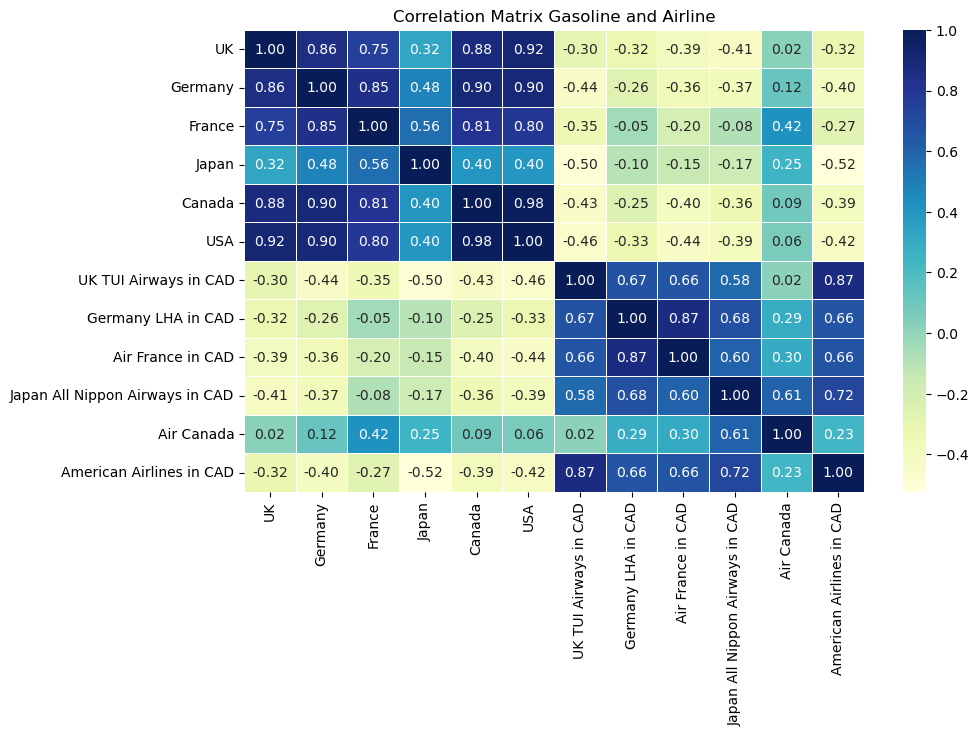

In [34]:
# Calculate and plot the correlation
import seaborn as sns
all_corr = all_df.corr()

# Set up the subplots
fig, axs = plt.subplots(ncols=1, figsize=(10, 6))

# sns.heatmap(before_2020_df.corr(), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5, ax=axs[0])
# axs[0].set_title("Correlation Matrix before Pandemic")


sns.heatmap(all_df.corr(), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5, ax=axs)
axs.set_title("Correlation Matrix Gasoline and Airline")

## Analysis on correlation between gasoline price and airline stocks
### UK and UK Airways has a weak to medium negative linear correlation at -0.3.
### Germany and Germany LHA has a weak to medium negative correlation at -0.26.
### France and Air France has a weak negative correlation at -0.2.
### Japan and Japan airline has a weak to medium negative correlation at -0.17
### Canada and Air Canada has a weak positive correlation at 0.09.
### USA and American Airlines has a medium negative linear correlation at -0.42.